In [2]:
# GENSIM
# INSTRUCTIONS: run this code, stop the runtime, then skip this cell and run the
# second cell.
!pip install --no-cache-dir --upgrade numpy scipy gensim
!pip install --no-cache-dir pandas==2.2.2  # Reinstall the required pandas version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 240.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 159.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 158.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 150.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 181.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Gensim version:", gensim.__version__)

In [ ]:
# prompt: downgrade numpy to 1.x
!pip install numpy==1.26 --upgrade
# Now restart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [ ]:
import numpy as np
np.__version__
# Check you have 1.26.0

'1.26.4'

In [ ]:
# From Spacy Tutorial Notebook (author: Jerónimo Arenas-García)
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

#For fancy table Display
%load_ext google.colab.data_table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = "/content/drive/My Drive/MLA Project"

os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
# EXPLORE FINAL DATASET OF REVIEWS
reviews_all_df = pd.read_csv('all_reviews_lemmas_2.csv')
print(len(reviews_all_df))


111613


In [ ]:
reviews_all_df.head(2)

,recipe_id,recipe,user,rating,date,review,nltk_lemmas
0,1,Cheesy Amish Breakfast Casserole,Deborah Schmidt,5,01/01/2013,This has been my go-to recipe for a long time ...,"['recipe', 'long', 'time', 'post', 'delicious'..."
1,1,Cheesy Amish Breakfast Casserole,SR,5,11/01/2023,It was fabulous!Things I did different:1. I us...,"['fabulous', 'things', 'use', 'crumbled', 'bac..."


In [ ]:
# Eliminate reviews that only have stars, not text
reviews_df = reviews_all_df[reviews_all_df['nltk_lemmas'].notna()].copy()

In [ ]:
len(reviews_df)

109550

In [ ]:
# Recalculate the lemmas per recipe from reviews_df before removing items from reviews_df
# When uploading from csv, list in lemmas col is read as a string, need to transform it into a python list
import ast
reviews_df['nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(ast.literal_eval)
# Group by 'recipe_id' and 'recipe', and combine all 'nltk_lemmas' lists into one
grouped_lemmas = reviews_df.groupby(['recipe_id', 'recipe'])['nltk_lemmas'].apply(lambda lemmas: sum(lemmas, []))

# Create a new DataFrame
recipes_corpus_df = grouped_lemmas.reset_index()

# Check the result
# recipes_corpus_df.head()

In [ ]:
# Save in case it is needed
recipes_corpus_df.to_csv('recipes_corpus_df.csv', index=False)

In [ ]:
len(recipes_corpus_df)

824

In [ ]:
# Check number of unique users
unique_users = reviews_df['user'].unique()
print(len(unique_users))

72280


In [ ]:
# Get number of reviews per user
reviews_user = reviews_df['user'].value_counts()

# Maximum number of reviews by a single user
max_reviews = reviews_user.max()
print("Max reviews: ", max_reviews)
# Minimum number of reviews by a single user
min_reviews = reviews_user.min()
print("Min reviews: ", min_reviews)

Max reviews:  6543
Min reviews:  1


In [ ]:
# Store in a DF
reviews_user_df = reviews_user.reset_index()
reviews_user_df.columns = ['user', 'num_reviews']

In [ ]:
reviews_user_df.head()

,user,num_reviews
0,Anonymous,6543
1,Jennifer,126
2,Lisa,113
3,Karen,102
4,Kim,100


In [ ]:
# Eliminate all anonymous users
# Check if lower case is needed
# reviews_df['user'] = reviews_df['user'].str.lower()
# Do not use, otherwise there are users that get confounded in one

# Remove all rows where user is: Anonymous
reviews_df = reviews_df[reviews_df['user'] != 'Anonymous']

In [ ]:
# Reprocess
reviews_user = reviews_df['user'].value_counts()

reviews_user_df = reviews_user.reset_index()
reviews_user_df.columns = ['user', 'num_reviews']

In [ ]:
reviews_user_df.head()

,user,num_reviews
0,Jennifer,126
1,Lisa,113
2,Karen,102
3,Kim,100
4,Heather,97


In [ ]:
# We can eliminate these for final notebook, just to check

In [ ]:
len(reviews_user_df[reviews_user_df['num_reviews'] > 10])

478

In [ ]:
len(reviews_user_df[reviews_user_df['num_reviews'] > 15])

274

In [ ]:
len(reviews_user_df[reviews_user_df['num_reviews'] > 20])

179

In [ ]:
len(reviews_user_df[reviews_user_df['num_reviews'] < 3])

67766

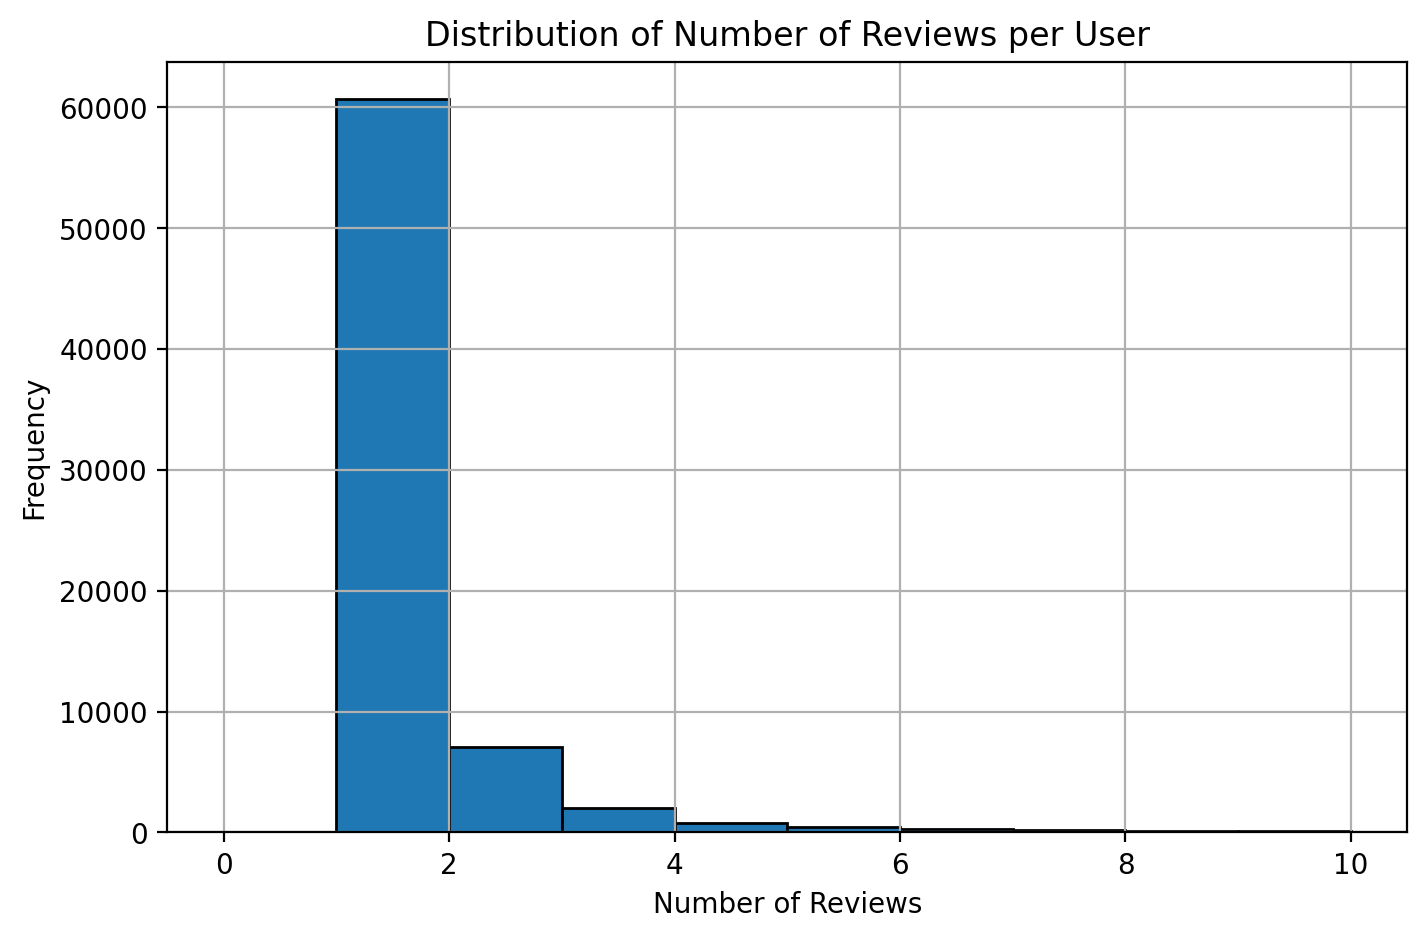

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(reviews_user_df['num_reviews'], bins=10, edgecolor='black', range=(0, 10))
plt.title('Distribution of Number of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Check number of unique recipes
unique_recipes = reviews_df['recipe'].unique()
print(len(unique_recipes))

815


In [ ]:
# Create user dataframe
user_df = pd.DataFrame({'user': reviews_df['user'].unique()})
user_df['user_id'] = range(len(user_df))
user_df = user_df[['user_id', 'user']]

In [ ]:
user_df.head()

,user_id,user
0,0,Deborah Schmidt
1,1,SR
2,2,QuickOrzo5381
3,3,imajwru
4,4,Mary Heston


In [ ]:
# Merge reviews_df with user_df to get user_id attached to each review
df = reviews_df.merge(user_df, on='user', how='left')

# Select only the needed columns
ratings_df = df[['user_id', 'recipe_id', 'rating']]


In [ ]:
ratings_df.head(6)

,user_id,recipe_id,rating
0,0,1,5
1,1,1,5
2,2,1,5
3,3,1,4
4,4,1,5
5,5,1,4


In [ ]:
# To check on merge
ratings_df[ratings_df['user_id']==5]

,user_id,recipe_id,rating
5,5,1,4
172,5,2,5
35689,5,407,5


In [ ]:
reviews_df[reviews_df['user'] == 'Helcat']['recipe_id']

,recipe_id
6,1
214,2
39031,407


In [ ]:
# Upload information about the recipes
recipes_df = pd.read_csv('recipes_with_reviews.csv')

In [ ]:
len(recipes_df)

823

In [ ]:
recipes_df.head()

,recipe_id,Title,Cuisine,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,1,Cheesy Amish Breakfast Casserole,Amish and Mennonite,10 mins,55 mins,1 hr 15 mins,12,314.0,23g,12g,22g
1,2,Best Vinegar Coleslaw,Amish and Mennonite,15 mins,5 mins,20 mins,8,224.0,9g,35g,2g
2,3,Pennsylvania-Dutch Pickled Beets and Eggs,Amish and Mennonite,15 mins,30 mins,2 days 45 mins,8,252.0,5g,45g,7g
3,4,Amish Macaroni Salad,Amish and Mennonite,15 mins,10 mins,1 hr 25 mins,6,532.0,25g,66g,9g
4,5,Amish Friendship Bread Starter,Amish and Mennonite,30 mins,NaN,10 days 40 mins,120,34.0,0g,8g,1g


In [ ]:
# OBS: Recipe id= 574  was eliminated when creating recipes_df, as it was duplicated, but we have it in all the WE processing
# Then, we will calculate the recipes WE with it, and eliminate it a posteriori before calculating similarities

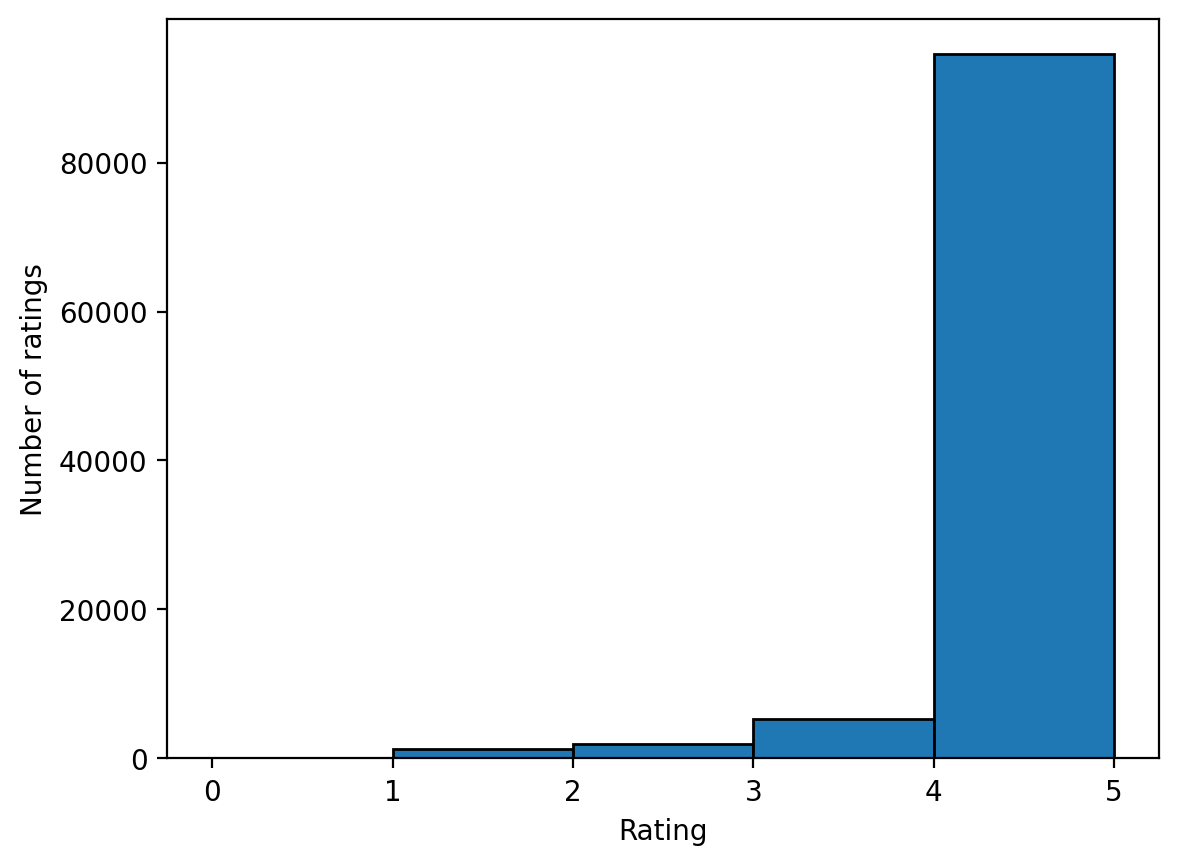

In [ ]:
# Plot the distribution of ratings
plt.hist(ratings_df.rating, bins=5, edgecolor='black', range=(0, 5))
plt.ylabel('Number of ratings')
plt.xlabel('Rating')
plt.show()

Most reviews have the highest rating, not helpful.

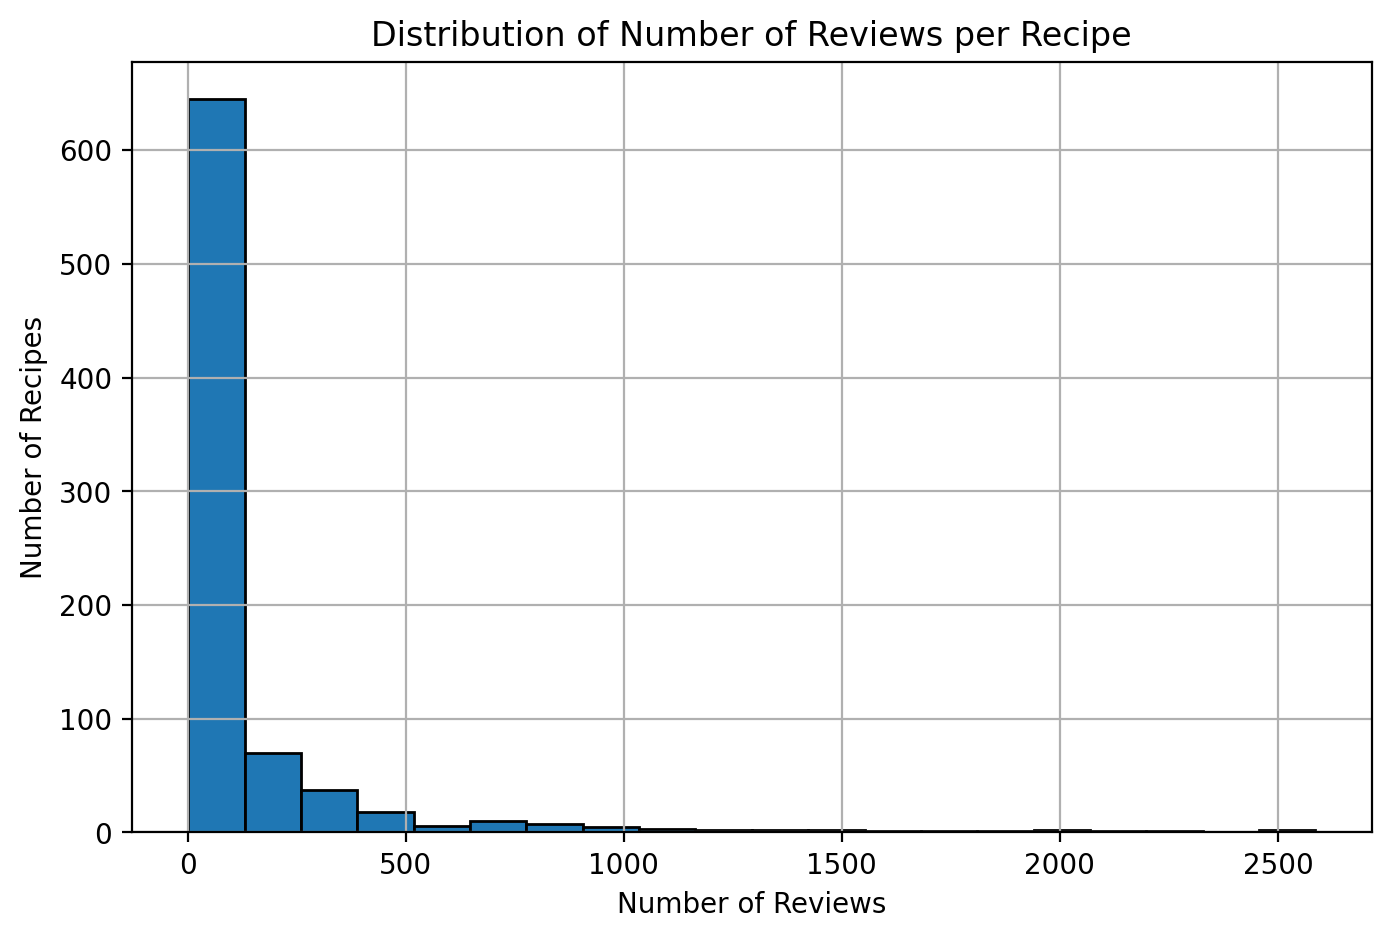

In [ ]:
# REviews per recipe
reviews_per_recipe = ratings_df['recipe_id'].value_counts()
plt.figure(figsize=(8, 5))
plt.hist(reviews_per_recipe, bins=20, edgecolor='black')
plt.title('Distribution of Number of Reviews per Recipe')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Recipes')
plt.grid(True)
plt.show()

As expected, there are not so many recipes with lots of reviews.

In [ ]:
# Filter to keep users and recipes with a minimum of reviews
min_reviews = 5
# Users with at least 5 reviews
users_min_reviews = ratings_df['user_id'].value_counts()
users_min_reviews = users_min_reviews[users_min_reviews >= min_reviews].index

# Recipes with at least 5 reviews
recipes_min_reviews = ratings_df['recipe_id'].value_counts()
recipes_min_reviews = recipes_min_reviews[recipes_min_reviews >= min_reviews].index

In [ ]:
print(len(users_min_reviews))
print(len(recipes_min_reviews))

1680
644


In [ ]:
# Recalculate the datasets
filtered_ratings_df = ratings_df[
    (ratings_df['user_id'].isin(users_min_reviews)) &
    (ratings_df['recipe_id'].isin(recipes_min_reviews))
]

filtered_user_df = user_df[user_df['user_id'].isin(users_min_reviews)]
filtered_recipe_df = recipes_df[recipes_df['recipe_id'].isin(recipes_min_reviews)]

In [ ]:
print('Number of filtered ratings: ', len(filtered_ratings_df))
print('Number of filtered users: ', len(filtered_user_df))
print('Number of filtered recipes: ', len(filtered_recipe_df))

Number of filtered ratings:  18738
Number of filtered users:  1680
Number of filtered recipes:  643


In [ ]:
# OBS: to run if loading a previouly calculated Dict and Bow
from gensim.corpora import Dictionary, MmCorpus

D_recipes = Dictionary.load("recipes_dictionary.dict")
corpus_bow_recipes = MmCorpus("recipes_corpus.mm")

# Recover the corpus
corpus_recipes = [[D_recipes[id] for id, _ in doc] for doc in corpus_bow_recipes]

# Convert to plain list to recover original bow, to be used in some methods instead of the MmCorpus object
recipes_bow = list(corpus_bow_recipes)

In [ ]:
# Recalculate the TF-IDF, to use it to weight in the computation of the recipe WE
from gensim.models import TfidfModel

# Create the TF-IDF model from the BoW corpus
tfidf_model = TfidfModel(recipes_bow)

In [ ]:
# Recover our WE for each token calculated in Part I
from gensim.models import KeyedVectors

# Load back with memory-mapping = read-only, shared across processes.
fastText_wv = KeyedVectors.load("model_fastText.wordvectors", mmap='r')

In [ ]:
# Create a function that allows to calculate for each recipe its WE, by averaging
# the WE of its lemmas, weighted by the tf-idf (instead of regular average)
def tfidf_weighted_embedding(bow_doc, tfidf_model, dictionary, embedding_model):
    # List of (word_id, tf-idf weight)
    tfidf_doc = tfidf_model[bow_doc]

    vecs = []
    weights = []

    for word_id, weight in tfidf_doc:
        word = dictionary[word_id]
        if word in embedding_model:
            vecs.append(embedding_model[word] * weight)
            weights.append(weight)

    if weights:
        return np.sum(vecs, axis=0) / np.sum(weights)
    else:
        return np.zeros(embedding_model.vector_size)

In [ ]:
# Calculate the weighted embedding of each recipe
recipe_embeddings = [tfidf_weighted_embedding(bow_doc, tfidf_model, D_recipes, fastText_wv)for bow_doc in recipes_bow]

In [ ]:
# Store it in recipes_corpus_df
recipes_corpus_df['embedding'] = recipe_embeddings

In [ ]:
# To check
len(recipes_corpus_df.loc[recipes_corpus_df.recipe_id == 1, 'embedding'].values[0])

300

In [ ]:
# Check 574 is the id of the duplicated recipe
recipes_corpus_df.loc[recipes_corpus_df['recipe_id']==574,['recipe', 'recipe_id']]

,recipe,recipe_id
534,Speculaas Cookies or Spicy Sinterklass Cakes,574


In [ ]:
# Delete recipe_id= 574 in recipes_corpus_df, to have matching recipe_corpus_df and recipes_df
recipes_corpus_df = recipes_corpus_df[recipes_corpus_df['recipe_id'] != 574]

In [ ]:
# Delete recipes that have been filtered out because they have less than 5 reviews
recipes_corpus_df = recipes_corpus_df[recipes_corpus_df['recipe_id'].isin(recipes_min_reviews)]


In [ ]:
# Check same lenght than filtered_recipe_df
if(len(recipes_corpus_df)==len(filtered_recipe_df)):
  print("Same lenght")

Same lenght


In [ ]:
# Once we have the WE for the filtered recipes, we calculate the similarities to create the similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(list(recipes_corpus_df['embedding']))

In [ ]:
similarity_matrix.shape

(643, 643)

In [ ]:
# Create mapping from recipe_id to row index in similarity_matrix, otherwise error when recovering matching item fo a given similarity
# when giving recommendations for a user
recipe_id_to_index = {r_id: idx for idx, r_id in enumerate(recipes_corpus_df['recipe_id'])}

In [ ]:
# Create the reverse mapping
index_to_recipe_id = {idx: r_id for r_id, idx in recipe_id_to_index.items()}

In [ ]:
# REcommend to a given user similar recipes to the ones he liked
filtered_user_df.head()

,user_id,user
14,14,mumto5
20,20,blackhighheels
21,21,Marie
24,24,DREGINEK
34,34,Vicki


In [ ]:
# Choose a user (20 has reviews that are not all 5 stars)
userId = 20

ratings_userId = filtered_ratings_df.loc[filtered_ratings_df['user_id'] == userId]
ratings_userId.sort_values(ascending=False,by=['rating'])

,user_id,recipe_id,rating
20,20,1,5
26109,20,306,5
61585,20,683,5
98501,20,882,5
11487,20,189,4
20292,20,271,4
29228,20,310,3
34357,20,364,3
55222,20,577,3
69320,20,705,3


In [ ]:
# Recover the recipes that the user liked more
min_stars=4
filtered = ratings_userId[ratings_userId['rating'] >= min_stars]

# Sort by rating descending, then by original index to preserve order
filtered = filtered.sort_values(by='rating', ascending=False)

# Drop duplicates, if any
recipes_liked = filtered.drop_duplicates(subset='recipe_id')['recipe_id'].tolist()

In [ ]:
recipes_liked

[1, 306, 683, 882, 189, 271]

In [ ]:
top_n = 3

for recipe_id in recipes_liked:
    if recipe_id not in recipe_id_to_index:
        print(f"Recipe {recipe_id} not in similarity matrix — skipping.")
        continue

    idx = recipe_id_to_index[recipe_id]

    # Print title
    title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == recipe_id, 'Title'].values[0]
    print('\nRecommended recipes similar to ' + title + ':')

    # Get sorted indices of most similar recipes
    similar_indices = np.argsort(similarity_matrix[idx])[::-1]
    # print(idx, "similar: ", similar_indices)
    # Exclude itself (first entry) and take tpo_n
    similar_indices = [i for i in similar_indices if i != idx][:top_n]

    # print("Selected top 3: ", similar_indices)

    for sim_idx in similar_indices:
        similar_recipe_id = index_to_recipe_id[sim_idx]
        # print('similar idx: ', sim_idx, 'mapped id: ', similar_recipe_id)
        similar_title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == similar_recipe_id, 'Title'].values[0]
        sim_score = similarity_matrix[idx][sim_idx]
        # print(f'  - {similar_recipe_id} {similar_title} (Similarity: {sim_score:.3f})')
        print(f'  - {similar_title} (Similarity: {sim_score:.3f})')



Recommended recipes similar to Cheesy Amish Breakfast Casserole:
  - Christmas Brunch Casserole (Similarity: 0.993)
  - Amish Casserole (Similarity: 0.966)
  - Bierock Casserole (Similarity: 0.966)

Recommended recipes similar to Creamy Cajun Chicken Pasta:
  - Cajun Chicken Pasta (Similarity: 0.998)
  - Cajun Seafood Pasta (Similarity: 0.988)
  - Louisiana Shrimp Creole (Similarity: 0.980)

Recommended recipes similar to Basic Crêpes:
  - French Crêpes (Similarity: 0.992)
  - Real French Crêpes (Similarity: 0.991)
  - Dessert Crepes (Similarity: 0.990)

Recommended recipes similar to Mulligatawny Soup:
  - Dad's New Zealand Mince Stew (Similarity: 0.979)
  - Indian Chicken Curry (Similarity: 0.978)
  - Chef John's Mulligatawny Soup (Similarity: 0.977)

Recommended recipes similar to Brazilian Chicken with Coconut Milk:
  - Jamaican Style Curry Chicken (Similarity: 0.990)
  - Keema Aloo (Ground Beef and Potatoes) (Similarity: 0.989)
  - Ginataang Manok (Chicken Cooked in Coconut Milk)

In [ ]:
# Check least similar, out of curiosity
bottom_n = 3

for recipe_id in recipes_liked:
    if recipe_id not in recipe_id_to_index:
        print(f"Recipe {recipe_id} not in similarity matrix — skipping.")
        continue

    idx = recipe_id_to_index[recipe_id]

    # Print title
    title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == recipe_id, 'Title'].values[0]
    print('\nLeast similar recipes to ' + title + ':')

    # Get sorted indices of most similar recipes
    non_similar_indices = np.argsort(similarity_matrix[idx])
    # print(idx, "not: ", non_similar_indices)
    # REcover least similar
    non_similar_indices = non_similar_indices[:bottom_n]
    # print("Least 3 similar: ", non_similar_indices)

    for sim_idx in non_similar_indices:
        non_similar_recipe_id = index_to_recipe_id[sim_idx]
        # print('non similar idx: ', sim_idx, 'mapped id: ', non_similar_recipe_id)
        non_similar_title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == non_similar_recipe_id, 'Title'].values[0]
        sim_score = similarity_matrix[idx][sim_idx]
        # print(f'  - {non_similar_recipe_id} {non_similar_title} (Non-similarity: {sim_score:.3f})')
        print(f'  - {non_similar_title} (Non-similarity: {sim_score:.3f})')



Least similar recipes to Cheesy Amish Breakfast Casserole:
  - Refreshing Brazilian Lemonade (Non-similarity: 0.748)
  - Mojito Perfecto (Non-similarity: 0.760)
  - Apple Strudel II (Non-similarity: 0.779)

Least similar recipes to Creamy Cajun Chicken Pasta:
  - Apple Strudel II (Non-similarity: 0.740)
  - German Rocks (Non-similarity: 0.760)
  - Dutch Cookies (Non-similarity: 0.762)

Least similar recipes to Basic Crêpes:
  - Rabo Encendido (Cuban Oxtail Stew) (Non-similarity: 0.700)
  - Pork Roast and Sauerkraut (Non-similarity: 0.700)
  - Elk Steak Marinade (Non-similarity: 0.706)

Least similar recipes to Mulligatawny Soup:
  - Apple Strudel II (Non-similarity: 0.739)
  - Gera's Amish Funny Cake (Non-similarity: 0.776)
  - Sugared Danish Butter Cookies with Pecan Halves (Non-similarity: 0.779)

Least similar recipes to Brazilian Chicken with Coconut Milk:
  - Apple Strudel II (Non-similarity: 0.716)
  - Eclairs (Non-similarity: 0.764)
  - Gera's Amish Funny Cake (Non-similarity: 

In [ ]:
# SIMILARITIES USING DIRECT RECIPE EMBEDDINGS

# Recover our WE calculated directly for each recipe in Part I
recipes_embeddings_df = pd.read_csv('recipes/recipes_embeddings.csv')
recipes_embeddings_df['embedding'] = recipes_embeddings_df['embedding'].apply(ast.literal_eval)
# len(grouped_reviews_df.iloc[0]['embedding'])

In [ ]:
recipes_embeddings_df.columns


Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'recipe_id', 'recipe',
       'filtered_nltk_lemmas', 'embedding'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
recipes_embeddings_df = recipes_embeddings_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0.2', 'Unnamed: 0'])

In [ ]:
# Cheack the length of the dataframe
len(recipes_embeddings_df)


824

In [ ]:
# recipes_embeddings_df[recipes_embeddings_df['recipe_id']==574]

In [ ]:
# Delete from recipes_embeddings_df duplicated recipe id=574 and recipes with no reviews, as we did previously with recipes_corpus_df
recipes_embeddings_df = recipes_embeddings_df[recipes_embeddings_df['recipe_id'] != 574]
recipes_embeddings_df = recipes_embeddings_df[recipes_embeddings_df['recipe_id'].isin(recipes_min_reviews)]


In [ ]:
# Check same lenght than recipes_corpus_df
if(len(recipes_embeddings_df)==len(recipes_corpus_df)):
  print("Same lenght")

Same lenght


In [ ]:
recipes_corpus_df.columns

Index(['recipe_id', 'recipe', 'nltk_lemmas', 'embedding'], dtype='object')

In [ ]:
# Change the name of the column of direct embeddings in recipes_embeddings_df
recipes_embeddings_df = recipes_embeddings_df.rename(columns={'embedding': 'direct_embedding'})

In [ ]:
# Merge the direct embeddings with the recipe_corpus_df
merged_df = pd.merge(recipes_corpus_df, recipes_embeddings_df, on = 'recipe_id', how='inner')

In [ ]:
merged_df.columns

Index(['recipe_id', 'recipe_x', 'nltk_lemmas', 'embedding', 'recipe_y',
       'filtered_nltk_lemmas', 'direct_embedding'],
      dtype='object')

In [ ]:
# Calculate a similarity matrix with the direct embeddings
similarity_direct_matrix = cosine_similarity(list(merged_df['direct_embedding']))

In [ ]:
# Check similarities calculated by both methods for a given (i,j)
print("Direct WE: ", similarity_direct_matrix[0][10])
print("Weighted avg WE: ", similarity_matrix[0][10])

Direct WE:  0.930146468779995
Weighted avg WE:  0.87819046


In [ ]:
# Do a function with this code, passing the similarity matrix, so we can reuse it in both cases?
top_n = 3

for recipe_id in recipes_liked:
    if recipe_id not in recipe_id_to_index:
        print(f"Recipe {recipe_id} not in direct similarity matrix — skipping.")
        continue

    idx = recipe_id_to_index[recipe_id]

    # Print title
    title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == recipe_id, 'Title'].values[0]
    print('\nRecommended recipes similar to ' + title + ':')

    # Get sorted indices of most similar recipes
    similar_indices = np.argsort(similarity_direct_matrix[idx])[::-1]
    # print(idx, "similar: ", similar_indices)
    # Exclude itself (first entry) and take tpo_n
    similar_indices = [i for i in similar_indices if i != idx][:top_n]

    # print("Selected top 3: ", similar_indices)

    for sim_idx in similar_indices:
        similar_recipe_id = index_to_recipe_id[sim_idx]
        # print('similar idx: ', sim_idx, 'mapped id: ', similar_recipe_id)
        similar_title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == similar_recipe_id, 'Title'].values[0]
        sim_score = similarity_direct_matrix[idx][sim_idx]
        # print(f'  - {similar_recipe_id} {similar_title} (Similarity: {sim_score:.3f})')
        print(f'  - {similar_title} (Similarity: {sim_score:.3f})')



Recommended recipes similar to Cheesy Amish Breakfast Casserole:
  - Christmas Brunch Casserole (Similarity: 0.997)
  - Bierock Casserole (Similarity: 0.983)
  - Amish Casserole (Similarity: 0.983)

Recommended recipes similar to Creamy Cajun Chicken Pasta:
  - Cajun Chicken Pasta (Similarity: 0.999)
  - Cajun Seafood Pasta (Similarity: 0.994)
  - Crawfish Fettuccine I (Similarity: 0.990)

Recommended recipes similar to Basic Crêpes:
  - Real French Crêpes (Similarity: 0.995)
  - French Crêpes (Similarity: 0.994)
  - Dessert Crepes (Similarity: 0.992)

Recommended recipes similar to Mulligatawny Soup:
  - Creamy Cajun Chicken Pasta (Similarity: 0.987)
  - Easy Indian Butter Chicken (Similarity: 0.986)
  - Indian Chicken Curry (Similarity: 0.986)

Recommended recipes similar to Brazilian Chicken with Coconut Milk:
  - Indian Chicken Curry (Similarity: 0.992)
  - Jamaican Style Curry Chicken (Similarity: 0.992)
  - Brazilian Fish Stew (Similarity: 0.992)

Recommended recipes similar to 

The results obtained with both methods are similar but not the same. Not easy to see if one option is better than the other one.